# Introduction to Data Science
## Homework 3

Student Name: Yuhan Liu

Student Netid: yl7576
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

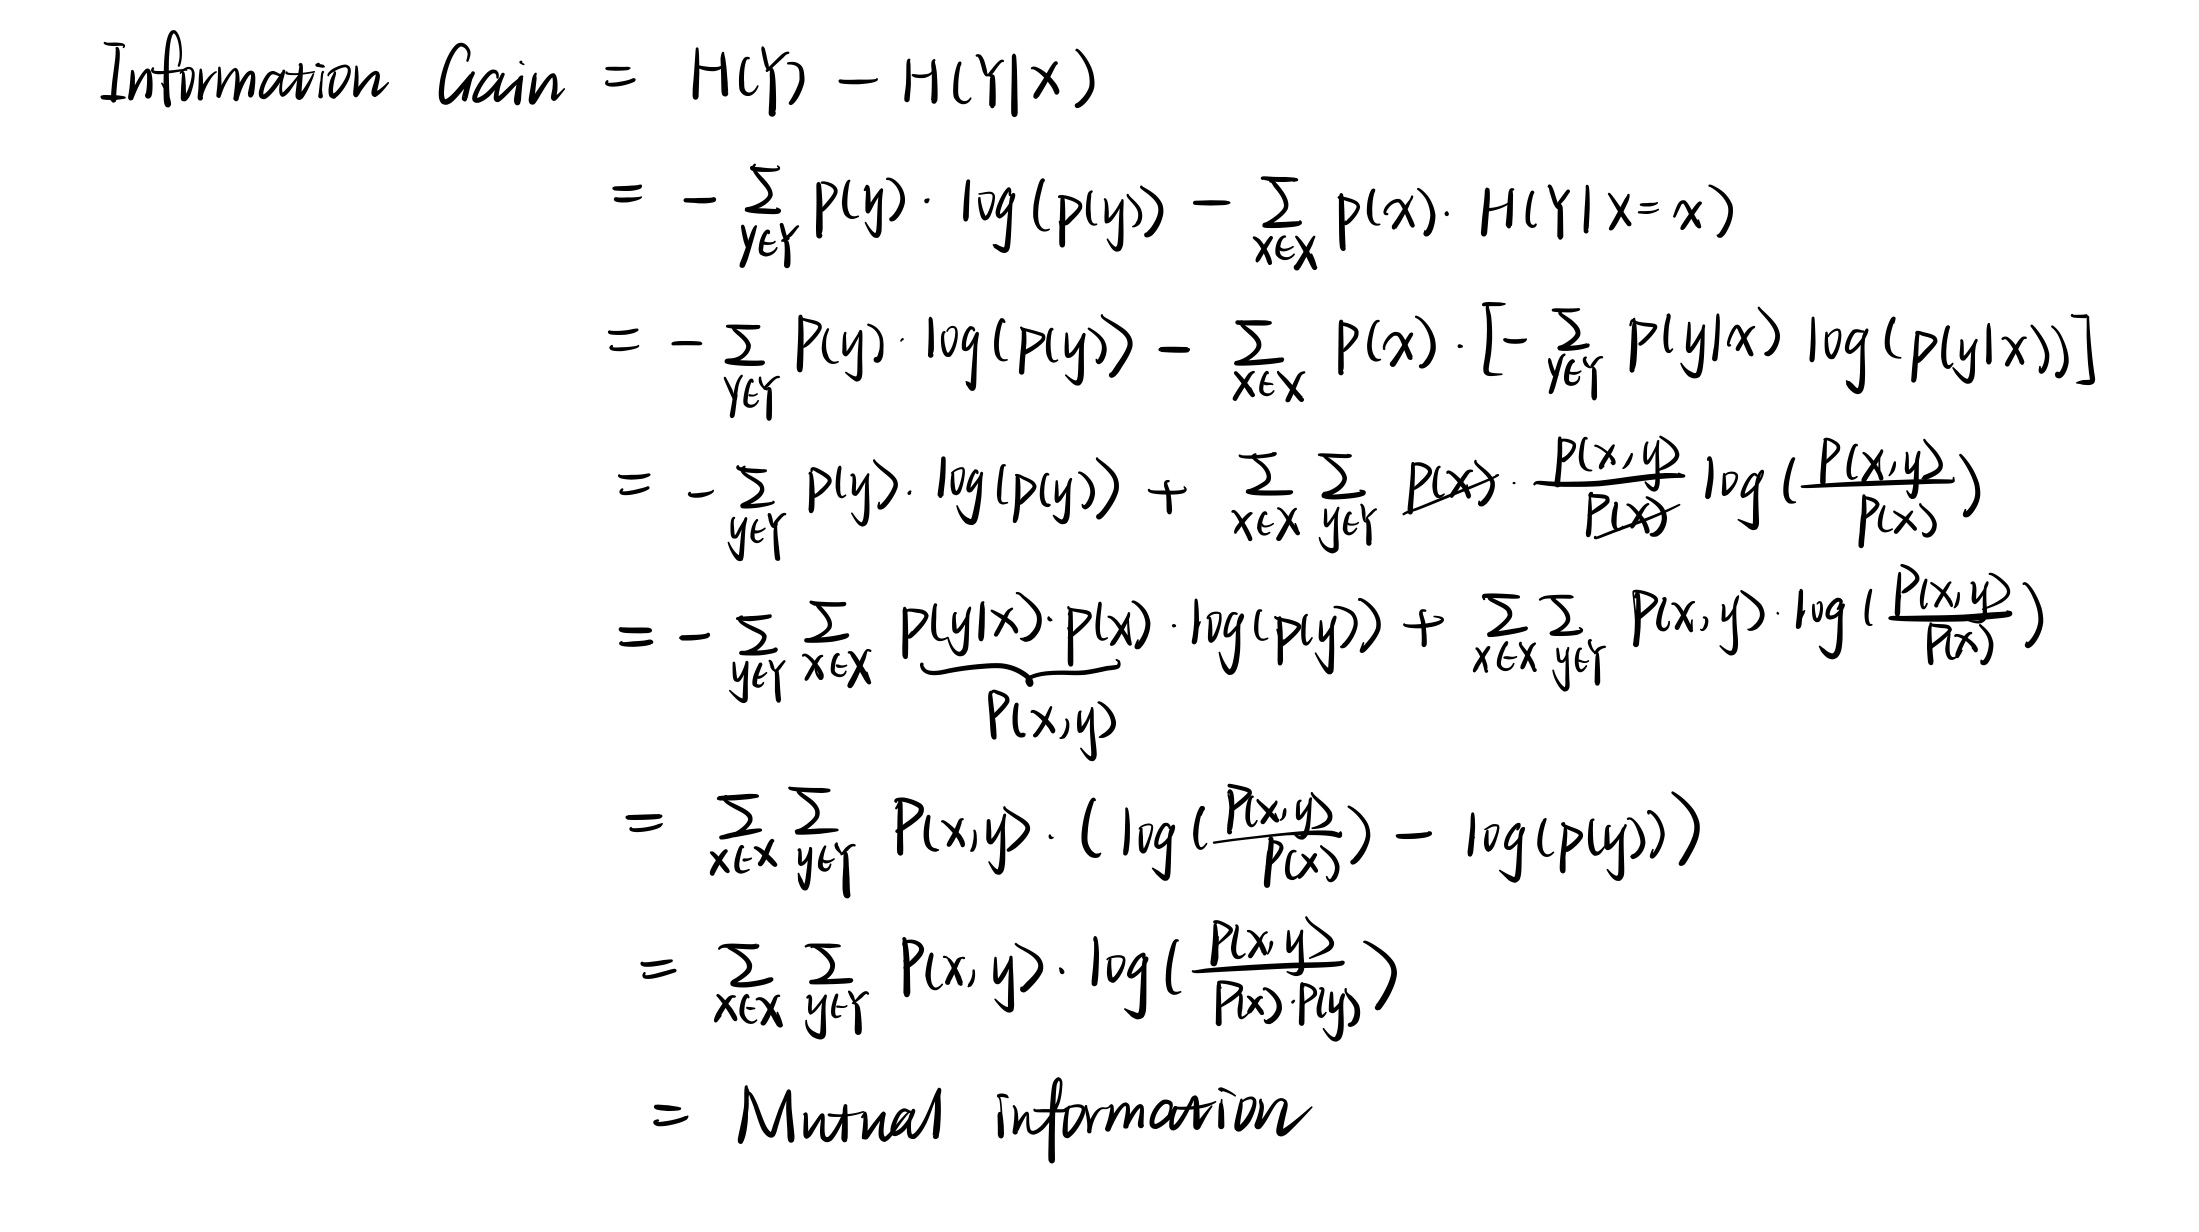

In [5]:
from IPython.display import Image
Image('/content/IMG_0170.jpg')

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [11]:
import pandas as pd
import numpy as np
dt = pd.read_csv('/Users/yuhanliu/Desktop/ds1001/HW3/cell2cell_data.csv')
dt.columns = ["revenue","outcalls","incalls","months","eqpdays","webcap","marryyes","travel","pcown","credictd","retcalls","churndep"]
dt_shuffled=dt.sample(frac=1).reset_index(drop=True)
split_row = int(round(0.8*len(dt_shuffled),0))
train_df = dt_shuffled[:split_row]
test_df = dt_shuffled[split_row:]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Answer: We can try to shuffle the dataset several times and see the first 10 lines of the dataset. If it shows different data every time, it means the shuffle method can generate some random samples. After that, every time we re-shuffle the dataset, we can see the summary of the train and test data by using data.describe(). If the statistics are almost the same after each shuffle, we can conclude that the sampling method is random.


3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [12]:
Y = train_df['churndep']
X = train_df.drop(labels = 'churndep', axis = 1)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

<function matplotlib.pyplot.show(*args, **kw)>

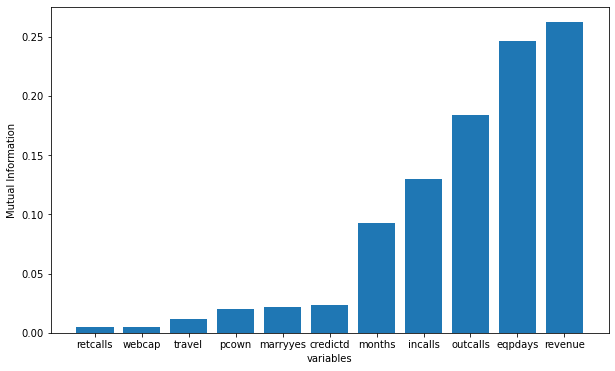

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi = DT.feature_importances_
feature_mi_dict = dict(zip(X.columns.values, feature_mi))
df_mi = pd.DataFrame(pd.Series(feature_mi_dict), columns = ['mi'])
df_mi = df_mi.sort_values('mi')

plt.figure(figsize=(10,6))
plt.bar(x = df_mi.index, height = df_mi['mi'])
plt.xlabel('variables')
plt.ylabel('Mutual Information')
plt.show

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

Answer: The top 3 most important features are revenue, eqpdays, and outcalls. Among these features, correlation between revenue and eqpdays and correlation between eqpdays and outcalls are negative and all other correlations are positive. Also, compared with churndep, revenue and outcalls have negative correlation with churndep while eqpdays has positive correlation with churndep. 

From my perspective, revenue is negatively correlated with churndep because customers who generate less revenue for the company are more likely to leave. If one customer spends lots of money on the company's product, he or she must be very loyal and will not easily leave. 

outcalls also has negative correlation with churndep. An outbound call is one initiated by a call center agent to a customer on behalf of a call center or client, so I believe more outbound calls show better service provided by the company. Therefore, more outbound calls the customer got, less likely he or she will leave. 

eqpdays is positively correlated with churndep. It means the less days the customer keep the equipment, the more likely he or she will drop. It is reasonable because if a customer only holds the equipment for a short time, it may because the equipment has some problems and the customer switches to another brand quickly, so the churn rate will be high. But for those who use the equipment for a long time, it means these customers are satisfied with the product and will not leave.



In [14]:
train_df[["revenue","eqpdays",'outcalls','churndep']].corr()


,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.220311,0.503221,-0.011848
eqpdays,-0.220311,1.000000,-0.245575,0.111911
outcalls,0.503221,-0.245575,1.000000,-0.035518
churndep,-0.011848,0.111911,-0.035518,1.000000


6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [15]:
Y_test = test_df['churndep']
X_test = test_df.drop(labels = 'churndep', axis = 1)
train_score = DT.score(X,Y)
test_score = DT.score(X_test,Y_test)
print('The train accuracy is', train_score)
print('The test accuracy is', test_score)

The train accuracy is 0.9998118296431036
The test accuracy is 0.5317360762669343


Explanation: the reason for the difference in accuracy may be the model overfits the train data so it does not perform well on the test data. Therefore, we need to fine tune the model and improve the accuracy on test data. 

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [19]:
# Code here
min_samples_split_values = range(10,2000,200)
min_samples_leaf_values = range(10,200,20)
len()

10

2\. Explain in words your reasoning for choosing the above ranges.

To choose the best range, I first try min_samples_split_values from 1-100, but the test accuracy did not improve from the previous result we get, so I think we need larger split numbers. Also, as we have 40k data, a split of 2000 is reasonable. For min_samples_leaf_values, I first used the same range (10,2000) for it, but it showed that there is almost no difference in accuracy when min_samples_leaf_values larger than 500, so I change it to 10-200 to train the model.


3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
dict_split = {}
for i in min_samples_split_values:
    dict_leaf = {}
    for j in min_samples_leaf_values:
        DT_tune = DecisionTreeClassifier(criterion='entropy', min_samples_split = i, min_samples_leaf = j)
        DT_tune.fit(X,Y)
        dict_leaf[j] = DT_tune.score(X_test, Y_test)
    dict_split[i] = dict_leaf


Text(0, 0.5, 'test accuracy')

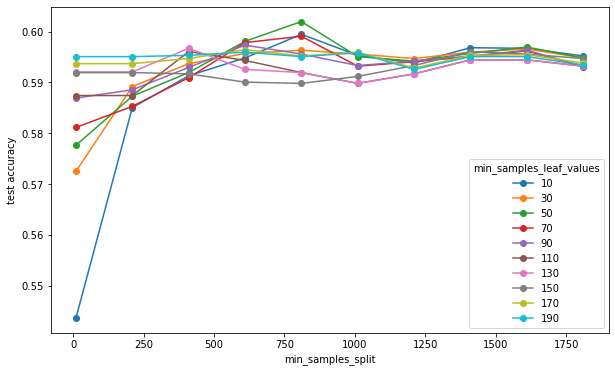

In [21]:
plt.figure(figsize=(10,6))
score_table = pd.DataFrame.from_dict(dict_split, orient='index')
plt.plot(score_table,'-o')
plt.legend(min_samples_leaf_values, title = 'min_samples_leaf_values')
plt.xlabel("min_samples_split")
plt.ylabel("test accuracy")

In [22]:
score_table

,10,30,50,70,90,110,130,150,170,190
10,0.543653,0.572504,0.577647,0.581159,0.586929,0.587431,0.592072,0.591947,0.593703,0.595083
210,0.585048,0.589187,0.587306,0.585299,0.588560,0.587431,0.592072,0.591947,0.593703,0.595083
410,0.591320,0.593703,0.591947,0.590943,0.592950,0.596086,0.596713,0.591696,0.594706,0.595334
610,0.594832,0.595710,0.598093,0.597842,0.597341,0.594330,0.592574,0.590065,0.596463,0.595961
810,0.599473,0.596337,0.601982,0.599097,0.595585,0.591947,0.591947,0.589814,0.595208,0.595083
1010,0.595334,0.595585,0.595083,0.593201,0.593327,0.589814,0.589814,0.591194,0.595961,0.595835
1210,0.593828,0.594706,0.594205,0.594079,0.594205,0.591696,0.591696,0.593327,0.592825,0.592574
1410,0.596839,0.595961,0.595710,0.595083,0.595208,0.594456,0.594456,0.596086,0.595334,0.595083
1610,0.596713,0.596588,0.596964,0.596212,0.596337,0.594456,0.594456,0.595585,0.595459,0.595083
1810,0.595208,0.594832,0.594832,0.593076,0.593201,0.593201,0.593201,0.594706,0.593828,0.593452


4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

Answer: The best accuracy is 0.601982, it occurs when min_samples_split = 810 and min_samples_leaf is 50

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Answer:

First of all, the churn production model is bad and I will not use the model in a real business environment. The final accuracy is 0.6, but even if I guess, I will gain an accuracy of 50%. Therefore, it should not be actually used in a real business. 

If we can choose a better model and gain higher accuracy, the prediction model might be a good tool for the business and marketing because it provides quantitative metrics for whether people will leave or not. It gives us a list of customers who will potentially leave in the future, so the marketing department can think of some ways to keep these customers to increase the retention rate. The company can predict future revenue based on the model and also come up with strategies to improve the service which is currently not that good and make customers leave. 


